<a href="https://colab.research.google.com/github/DoanAI/PROJECT/blob/main/MEOW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trần Ngọc Đoàn - 19146175 - PROJECT AI

Github: https://github.com/DoanAI/PROJECT.git

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import os
train_image_files_path = "/content/drive/MyDrive/AI/Project/training set"
valid_image_files_path = "/content/drive/MyDrive/AI/Project/test set"

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1/255)  
validation_data_gen = ImageDataGenerator(rescale=1/255)

In [5]:
train_generator = train_data_gen.flow_from_directory(train_image_files_path, target_size=(200, 200), class_mode='categorical')      
validation_generator = validation_data_gen.flow_from_directory(valid_image_files_path, target_size=(200, 200), class_mode='categorical')

Found 2900 images belonging to 29 classes.
Found 580 images belonging to 29 classes.


In [6]:
#MoHinh
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

In [7]:
model=Sequential()

In [8]:
model.add(Conv2D(32,(3,3), activation='relu',input_shape=(200,200,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))  
model.add(Flatten()) 
model.add(Dense(512, activation=tf.nn.relu))
model.add(Dense(29, activation=tf.nn.softmax))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 128)      0

In [9]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['acc'])

In [10]:
EPOCHS=100
history=model.fit(train_generator, steps_per_epoch=3, epochs=EPOCHS, verbose=1, 
                  validation_data = validation_generator, validation_steps=3)

Epoch 1/100
3/3 [==============================] - 129s 49s/step - loss: 5.4208 - acc: 0.0417 - val_loss: 3.5539 - val_acc: 0.0521
Epoch 2/100
3/3 [==============================] - 112s 47s/step - loss: 3.4998 - acc: 0.0208 - val_loss: 3.3372 - val_acc: 0.0938
Epoch 3/100
3/3 [==============================] - 96s 39s/step - loss: 3.3607 - acc: 0.0417 - val_loss: 3.3553 - val_acc: 0.0312
Epoch 4/100
3/3 [==============================] - 80s 32s/step - loss: 3.3390 - acc: 0.0833 - val_loss: 3.3746 - val_acc: 0.0521
Epoch 5/100
3/3 [==============================] - 80s 32s/step - loss: 3.3309 - acc: 0.0625 - val_loss: 3.3028 - val_acc: 0.0625
Epoch 6/100
3/3 [==============================] - 62s 24s/step - loss: 3.3377 - acc: 0.0417 - val_loss: 3.2641 - val_acc: 0.1250
Epoch 7/100
3/3 [==============================] - 54s 21s/step - loss: 3.2303 - acc: 0.1354 - val_loss: 3.1199 - val_acc: 0.1458
Epoch 8/100
3/3 [==============================] - 49s 17s/step - loss: 3.2112 - acc: 0.

In [11]:
model.save('meo.h5')
from tensorflow.keras.models import load_model
model=load_model('meo.h5')

In [13]:
score = model.evaluate(validation_generator,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])

Sai số kiểm tra là:  0.489311546087265
Độ chính xác kiểm tra là:  0.867241382598877


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper-left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


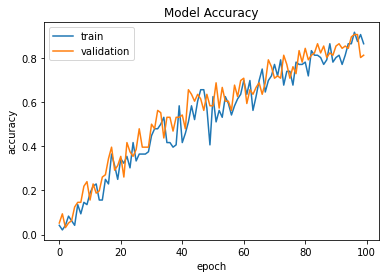

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper-left')

In [15]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [16]:
label=['Abyssinian','Bengal','Burmilla','Garfield','Gizmo','Grumpy','Havana Brown','Luna',
       'Manie Coon','Meo Anh Long Dai','Meo Anh Long Ngan','Meo Ba Tu','Meo Rung Na-uy','Meo Tam The',
       'Meo Xiem','Mia','Molly','Munchkin','Nala','Ocicat','Oriental','Princess','Ragdoll',
       'Scottist Fold','Simba','Singapura','Somali','Sophie','Sphynx']

Saving Abyssinian.jpg to Abyssinian.jpg
Saving Bengal.jpg to Bengal.jpg
Saving Burmilla.jpg to Burmilla.jpg
Saving Garfield.jpg to Garfield.jpg
Saving Gizmo.jpg to Gizmo.jpg
Saving Grumpy.jpg to Grumpy.jpg
Saving Havana Brown.jpg to Havana Brown.jpg
Saving Luna.jpg to Luna.jpg
Saving Manie Coon.jpg to Manie Coon.jpg
Saving Meo Anh Long Dai.jpg to Meo Anh Long Dai.jpg
Saving Meo Anh Long Ngan.jpg to Meo Anh Long Ngan.jpg
Saving Meo Ba Tu.jpg to Meo Ba Tu.jpg
Saving Meo Rung Na-uy.jpg to Meo Rung Na-uy.jpg
Saving Meo Tam The.jpg to Meo Tam The.jpg
Saving Meo Xiem.jpg to Meo Xiem.jpg
Saving Mia.jpg to Mia.jpg
Saving Molly.jpg to Molly.jpg
Saving Munchkin.jpg to Munchkin.jpg
Saving Nala.jpg to Nala.jpg
Saving Ocicat.jpg to Ocicat.jpg
Saving Oriental.jpg to Oriental.jpg
Saving Princess.jpg to Princess.jpg
Saving Ragdoll.jpg to Ragdoll.jpg
Saving Scottist Fold.jpg to Scottist Fold.jpg
Saving Simba.jpg to Simba.jpg
Saving Singapura.jpg to Singapura.jpg
Saving Somali.jpg to Somali.jpg
Saving S

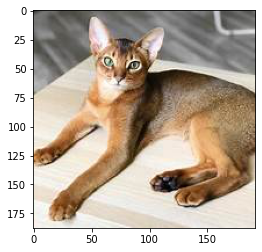

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
Giá trị dự đoán:  Bengal


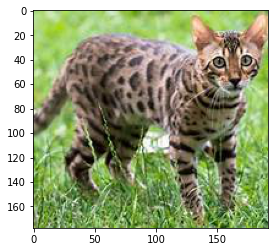

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
Giá trị dự đoán:  Burmilla


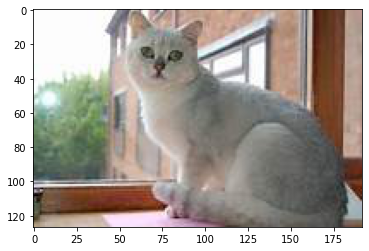

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
Giá trị dự đoán:  Garfield


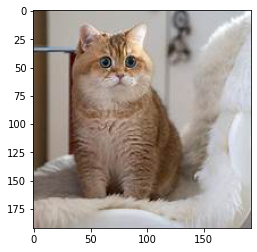

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
Giá trị dự đoán:  Gizmo


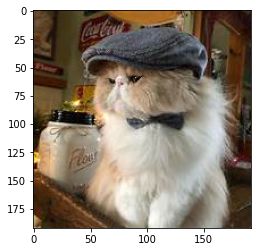

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
Giá trị dự đoán:  Grumpy


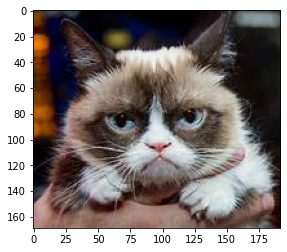

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
Giá trị dự đoán:  Havana Brown


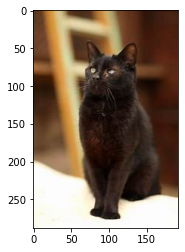

[[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 9.973972e-25
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]]
Giá trị dự đoán:  Gizmo


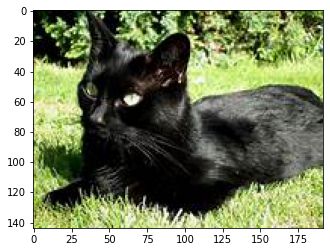

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
Giá trị dự đoán:  Manie Coon


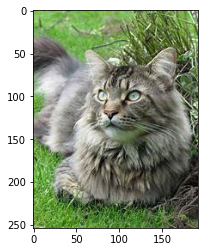

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
Giá trị dự đoán:  Meo Anh Long Dai


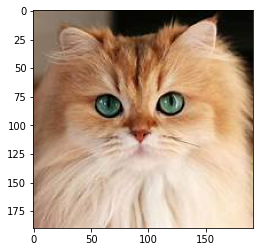

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
Giá trị dự đoán:  Meo Anh Long Ngan


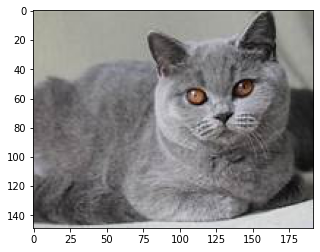

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
Giá trị dự đoán:  Meo Ba Tu


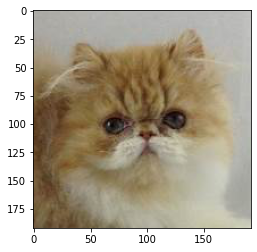

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
Giá trị dự đoán:  Meo Rung Na-uy


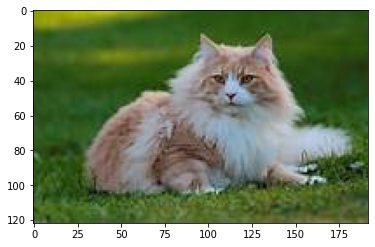

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
Giá trị dự đoán:  Meo Tam The


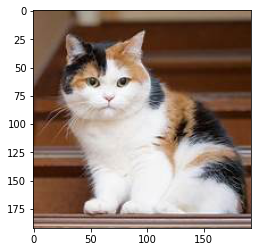

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
Giá trị dự đoán:  Meo Xiem


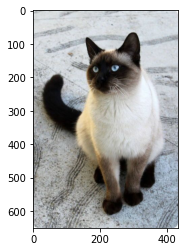

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
Giá trị dự đoán:  Munchkin


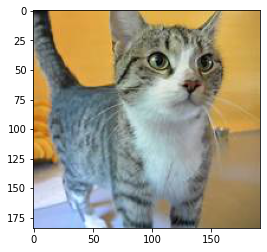

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
Giá trị dự đoán:  Bengal


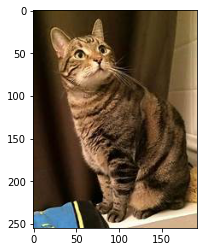

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
Giá trị dự đoán:  Munchkin


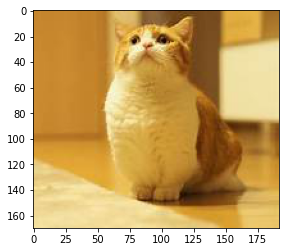

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
Giá trị dự đoán:  Nala


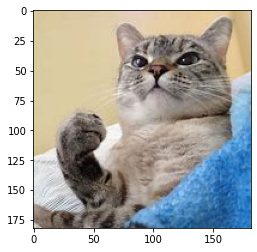

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
Giá trị dự đoán:  Ocicat


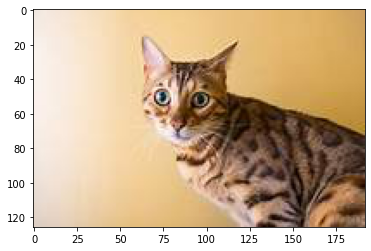

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0.]]
Giá trị dự đoán:  Oriental


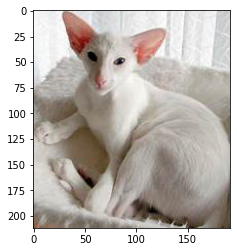

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0.]]
Giá trị dự đoán:  Princess


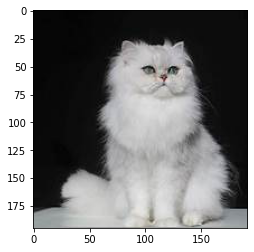

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0.]]
Giá trị dự đoán:  Ragdoll


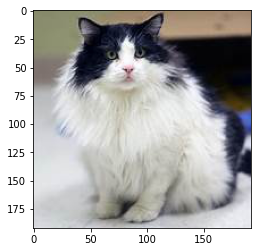

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0.]]
Giá trị dự đoán:  Scottist Fold


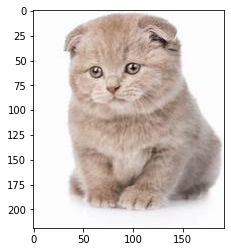

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0.]]
Giá trị dự đoán:  Simba


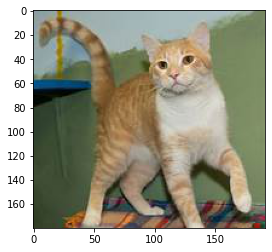

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0.]]
Giá trị dự đoán:  Singapura


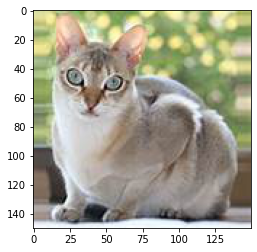

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0.]]
Giá trị dự đoán:  Somali


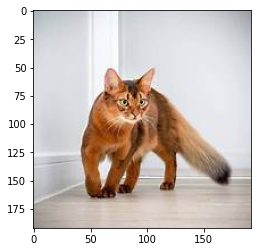

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0.]]
Giá trị dự đoán:  Sophie


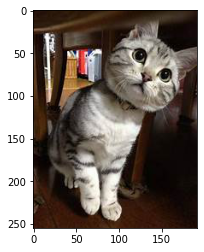

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1.]]
Giá trị dự đoán:  Sphynx


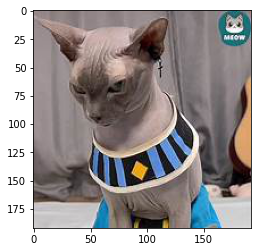

In [20]:
uploaded=files.upload()
for fn in uploaded.keys():
  #predicting images
  path='/content/' + fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))
  img=image.load_img(path,target_size=(200,200))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Giá trị dự đoán: ', label[np.argmax(y_predict)])
  plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')